# Spark Foundation

# Data Science & Business Analytics Tasks

# Task 1: Prediction using supervised ML

[As we know, Machine learning is a method of data analysis that helps in building models. It is a branch of artificial intelligence(AI) based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention. It has various types one being supervised learning in which the algorithm learns on a labeled dataset, which acts as an answer key that the algorithm can use to evaluate its accuracy on training data.]


# By Shreya Basu

In [2]:
#importing libraries required for doing the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading data from the link provided
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
#printing the first 5 lines of the dataset
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#printing the last 5 lines of the dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#it will give us all the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#it will give us the shape of the dataset i.e, columns and rows
data.shape

(25, 2)

In [7]:
#printing the entire dataset
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#used for calculating some statistical data like percentile, mean and std of the numerical values of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


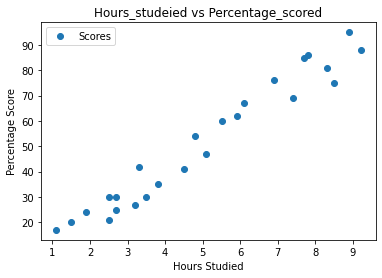

In [22]:
#plotting the distribution of scores on a 2-D graph
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours_studeied vs Percentage_scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
#we can validate the above graph using Pearson and Kendall rank correlation to show that the two variables are co-related
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
data.corr(method="kendall")

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


In [12]:
#preparing the data, we have to divide our data into attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [13]:
#splitting this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [14]:
#we have spliited our data, we will now train it
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training completed.")

Training completed.


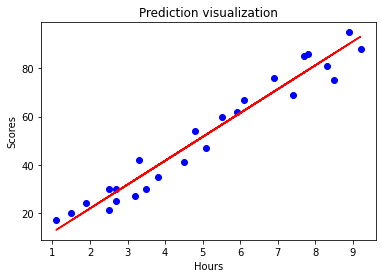

In [15]:
#plotting the regression line
line = reg.coef_*X+reg.intercept_

#plotting for the test data
plt.scatter(X, y, color="blue")
plt.plot(X, line, color="red")
plt.title("Prediction visualization")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [16]:
#we have completed training our model, we will now make predictions
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
#now comparing Actual vs Predicted in a dataframe
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


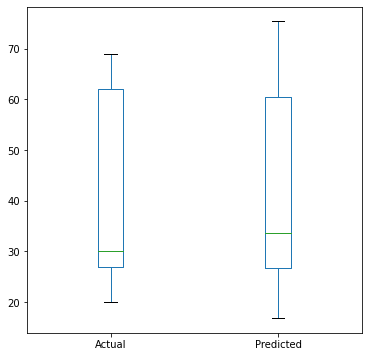

In [18]:
dataframe.plot(kind="box", figsize=(6,6))
plt.show()

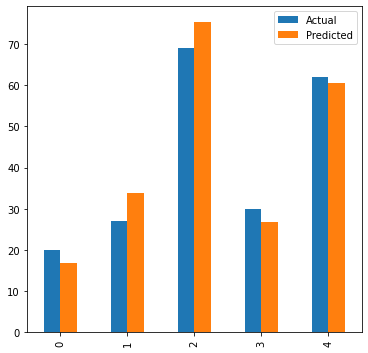

In [19]:
dataframe.plot(kind="bar", figsize=(6,6))
plt.show()

In [20]:
# You can also test with your own data
hours = [[9.25]]
pred = reg.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [21]:
from sklearn import metrics  
print('Mean Absolute Error =', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error =', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error = 4.183859899002975
Mean Squared Error = 21.5987693072174
